* 1. Data Prepration :-

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("heart_disease.csv")

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [56]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [57]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [60]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,normal,4


* 2. Exploratory Data Analysis (EDA):-

In [61]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


In [62]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

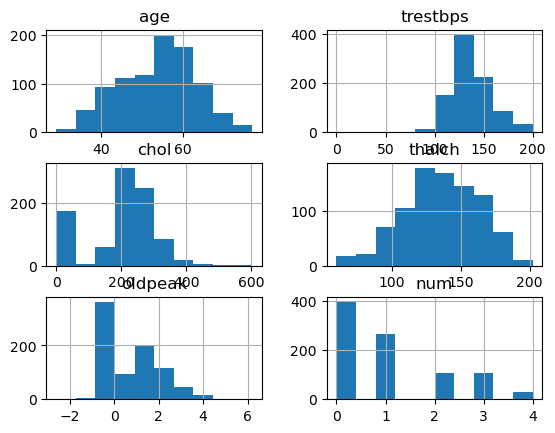

<Figure size 640x480 with 0 Axes>

In [63]:
df.hist()
plt.show()
plt.tight_layout()

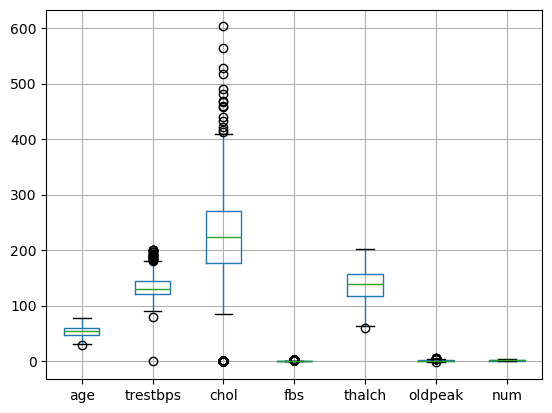

In [64]:
df.boxplot()
plt.show()

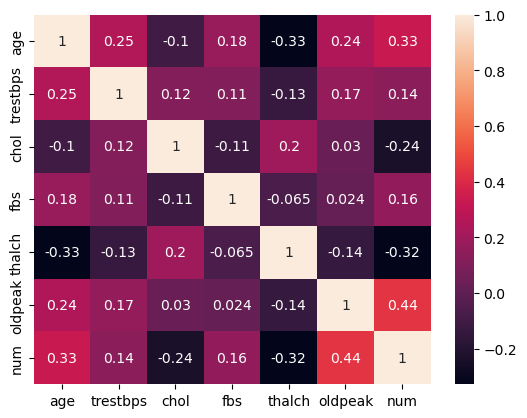

In [65]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()


3. Feature Engineering:-

In [66]:
df = pd.get_dummies(df)

In [67]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,41,135,203,False,132,0.0,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,57,140,192,False,148,0.4,0,False,True,True,...,False,True,False,False,False,True,False,True,False,False
3,52,118,186,False,190,0.0,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4,57,110,201,False,126,1.5,0,False,True,True,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,False,True,True,...,False,True,False,False,False,False,True,True,False,False
904,62,166,170,False,120,3.0,4,False,True,True,...,True,False,True,False,False,True,False,False,False,True
905,56,170,0,False,123,2.5,4,False,True,False,...,False,False,True,False,True,False,False,False,True,False
906,56,144,208,True,105,NaN,4,False,True,False,...,True,False,False,True,True,False,False,False,False,True


In [68]:
df.isna().sum()

age                          0
trestbps                     0
chol                         0
fbs                          0
thalch                       0
oldpeak                     62
num                          0
sex_Female                   0
sex_Male                     0
cp_asymptomatic              0
cp_atypical angina           0
cp_non-anginal               0
cp_typical angina            0
restecg_lv hypertrophy       0
restecg_normal               0
restecg_st-t abnormality     0
exang_FALSE                  0
exang_TRUE                   0
exang_TURE                   0
slope_downsloping            0
slope_flat                   0
slope_upsloping              0
thal_fixed defect            0
thal_normal                  0
thal_reversable defect       0
dtype: int64

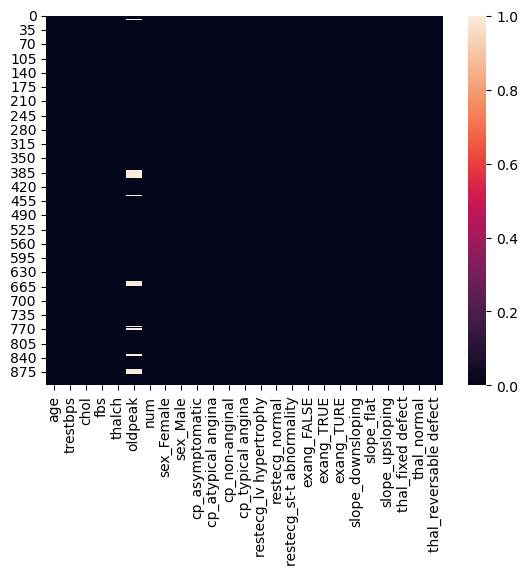

In [69]:
sns.heatmap(df.isna())
plt.show()

In [70]:
len(df)

908

In [71]:
for i in df.isna().sum():
  print((i/len(df))*100)

0.0
0.0
0.0
0.0
0.0
6.828193832599119
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [72]:
oldpeak_median = df['oldpeak'].median()
oldpeak_median

0.5

In [73]:
df['oldpeak'].fillna(oldpeak_median,inplace=True)

In [74]:
df.isna().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Female                  0
sex_Male                    0
cp_asymptomatic             0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_lv hypertrophy      0
restecg_normal              0
restecg_st-t abnormality    0
exang_FALSE                 0
exang_TRUE                  0
exang_TURE                  0
slope_downsloping           0
slope_flat                  0
slope_upsloping             0
thal_fixed defect           0
thal_normal                 0
thal_reversable defect      0
dtype: int64

Now, no more missing values are present in the datasets.

In [75]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

* 4. Decision Tree Classification:-

In [76]:
x = df.drop('num', axis=1)
y = df['num']

In [77]:
x

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,41,135,203,False,132,0.0,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
2,57,140,192,False,148,0.4,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False
3,52,118,186,False,190,0.0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
4,57,110,201,False,126,1.5,False,True,True,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
904,62,166,170,False,120,3.0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
905,56,170,0,False,123,2.5,False,True,False,False,...,False,False,True,False,True,False,False,False,True,False
906,56,144,208,True,105,0.5,False,True,False,False,...,True,False,False,True,True,False,False,False,False,True


In [78]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: int64

In [79]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [80]:
x_train

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
372,37,130,173,False,184,0.0,True,False,True,False,...,True,True,False,False,False,False,True,False,False,True
304,41,125,269,False,144,0.0,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
524,41,130,172,False,130,2.0,False,True,True,False,...,True,True,False,False,False,True,False,True,False,False
85,71,160,302,False,162,0.4,True,False,False,True,...,False,True,False,False,False,False,True,False,True,False
530,56,120,279,False,150,1.0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,61,142,200,True,100,1.5,False,True,False,False,...,True,True,False,False,True,False,False,True,False,False
192,72,160,0,False,114,1.6,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
629,55,140,295,False,136,0.0,False,True,False,False,...,True,True,False,False,False,True,False,False,True,False
559,59,140,0,False,117,1.0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True


In [81]:
y_train

372    0
304    0
524    1
85     0
530    1
      ..
835    1
192    0
629    1
559    1
684    1
Name: num, Length: 726, dtype: int64

In [82]:
x_test

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
251,56,130,459,False,114,0.0,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
732,59,167,0,False,128,2.0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
497,46,118,186,False,124,0.0,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
887,57,165,289,True,124,1.0,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
144,46,110,240,False,140,0.0,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,136,248,False,140,4.0,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
687,46,134,310,False,126,0.0,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
635,43,120,291,False,155,0.0,False,True,False,False,...,True,True,False,False,True,False,False,False,False,True
2,57,140,192,False,148,0.4,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False


In [83]:
y_test

251    0
732    1
497    1
887    1
144    0
      ..
899    1
687    1
635    1
2      0
402    1
Name: num, Length: 182, dtype: int64

Building Decision Tree Classifier using Entropy Criteria

In [84]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [86]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    115
0     67
Name: count, dtype: int64

In [87]:
model.feature_importances_

array([0.        , 0.        , 0.12977792, 0.        , 0.        ,
       0.12415722, 0.        , 0.        , 0.74606486, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [88]:
y_pred = model.predict(x_test)

In [89]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

In [90]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [91]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.79
Precision: 0.79
Recall: 0.86
F1 Score: 0.82


In [92]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

In [93]:
roc_auc 

np.float64(0.7952457795431976)

* 5. Hyperparameter Tuning:-

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
# Define the model
dt = DecisionTreeClassifier(random_state=42)

In [96]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']}

In [97]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                  
    scoring='accuracy',     
    n_jobs=-1)              

In [98]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [99]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}


In [100]:
# best model
best_dt_model = grid_search.best_estimator_

In [101]:
test_accuracy = best_dt_model.score(x_test, y_test)
print("Test Accuracy after tuning:", test_accuracy)

Test Accuracy after tuning: 0.8021978021978022


* Test Accuracy After The Hyper Parameter Tuning is 80%.

* 6.Model evaluation & Analysis:-

I evaluated the performance of the Decision Tree classifier using Accuracy, Precision, Recall, and F1-Score.


These metrics help understand how well the model predicts heart disease.


I also used the confusion matrix to see correct and incorrect predictions clearly.

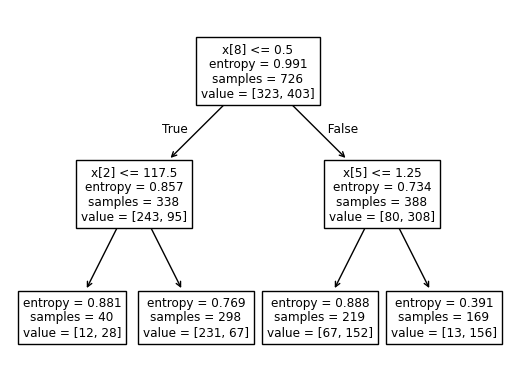

In [102]:
tree.plot_tree(model)
plt.show()

* INTERVIEW QUESTIONS :-

  
  1 :- What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


  ANSWER >-- here are some hyperparameter of decision tree,

*  max_depth :- it control how deep the can grow. if it too large then ovefitting, and if it too small then underfitting model.

*  min_sample_split :- minimum number of samples required to split a node. ig small value ->more split -> high varience -> overfitting .

*  criterion :- This metric used to decide the quality of a split. like ("Gini and Entropy") both usually give similar performance; entropy is slower.

*  max_features :- it set limits number of features to consider while splitting . The effect of this hyperparameter reduses the overfiting and speed up the training.

  

   Question 2. What is the difference between the Label encoding and One-hot encoding?

ANSWER >-- 

Actually both do the same tasks , but the minor difference in between the label_encoding and Onehot-Encoding is label encoding converts the categorical variable into single numerical integer as (1,2,3,4,5,.....) . WHILE 


OneHot_Encoding creates the new binary columns for each category like (0 or 1). 1 indicates the presence of that category , & 0 indicate the absebce of the category. 


